In [4]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

In [5]:
from pandas.io.json import json_normalize #
import folium
from geopy.geocoders import Nominatim 
import requests

# With an address name, I obtain in Latitude and Longitude using foursquare

In [6]:
address = 'Nairobi'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-1.2832533 36.8172449


In [7]:
CLIENT_ID = 'B1RGSNH1D0E2RJGS22MHBGRDTLWQJ5AODPX4KYBKEE5OUDJI' # your Foursquare ID
CLIENT_SECRET = 'EX34QPHPB4EUZS4LZB5M2VB1NIHGHBIGDYPA3RDI22RLW3N3' # your Foursquare Secret
VERSION = '20200630'
LIMIT = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: B1RGSNH1D0E2RJGS22MHBGRDTLWQJ5AODPX4KYBKEE5OUDJI
CLIENT_SECRET:EX34QPHPB4EUZS4LZB5M2VB1NIHGHBIGDYPA3RDI22RLW3N3


In [8]:
search_query = 'Restaurant'
radius = 5000
print(search_query + ' .... OK!')

Restaurant .... OK!


In [9]:
url = 'https://api.foursquare.com/v2/venues/search?client_id=B1RGSNH1D0E2RJGS22MHBGRDTLWQJ5AODPX4KYBKEE5OUDJI&client_secret=EX34QPHPB4EUZS4LZB5M2VB1NIHGHBIGDYPA3RDI22RLW3N3&ll=-1.2832533,36.8172449&v=20200630&query=Restaurant&radius=5000&limit=1000'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=B1RGSNH1D0E2RJGS22MHBGRDTLWQJ5AODPX4KYBKEE5OUDJI&client_secret=EX34QPHPB4EUZS4LZB5M2VB1NIHGHBIGDYPA3RDI22RLW3N3&ll=-1.2832533,36.8172449&v=20200630&query=Restaurant&radius=5000&limit=1000'

In [10]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f53ac57462789011ba53608'},
 'response': {'venues': [{'id': '4f47bf24e4b05259396d6c2e',
    'name': 'Campia Ethiopian Restaurant (Rue 104 Restaurant)',
    'location': {'address': 'Utalii Street',
     'crossStreet': 'Off Uhuru Highway',
     'lat': -1.2833833263205359,
     'lng': 36.81612968444824,
     'labeledLatLngs': [{'label': 'display',
       'lat': -1.2833833263205359,
       'lng': 36.81612968444824}],
     'distance': 124,
     'postalCode': '00100',
     'cc': 'KE',
     'city': 'Nairobi',
     'state': 'Nairobi',
     'country': 'Kenya',
     'formattedAddress': ['Utalii Street (Off Uhuru Highway)',
      'Nairobi',
      '00100',
      'Kenya']},
    'categories': [{'id': '4bf58dd8d48988d10a941735',
      'name': 'Ethiopian Restaurant',
      'pluralName': 'Ethiopian Restaurants',
      'shortName': 'Ethiopian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/ethiopian_',
       'suffix': '.png'},
      'primary'

In [11]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10a941735', 'name': 'E...",False,4f47bf24e4b05259396d6c2e,Utalii Street,KE,Nairobi,Kenya,Off Uhuru Highway,124,"[Utalii Street (Off Uhuru Highway), Nairobi, 0...","[{'label': 'display', 'lat': -1.28338332632053...",-1.283383,36.816130,NaN,00100,Nairobi,Campia Ethiopian Restaurant (Rue 104 Restaurant),v-1599319073,532983380
1,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,4c3b0f9462f1c928c7df8e53,Anniversary Towers,KE,Nairobi,Kenya,NaN,151,"[Anniversary Towers, Nairobi, Kenya]","[{'label': 'display', 'lat': -1.28209359091665...",-1.282094,36.816540,NaN,NaN,Nairobi,San Valencia Restaurant,v-1599319073,NaN
2,[],False,4c8a649bf0e19521ee472d1d,Barclays Plaza,KE,Nairobi,Kenya,Kenyatta Avenue,159,"[Barclays Plaza (Kenyatta Avenue), Nairobi, Ke...","[{'label': 'display', 'lat': -1.28460610652375...",-1.284606,36.817718,NaN,NaN,Nairobi,Vuli Bar & Restaurant,v-1599319073,NaN
3,"[{'id': '4bf58dd8d48988d1c8941735', 'name': 'A...",False,4e6c6426d1649db7999a3ff6,NaN,KE,Nairobi,Kenya,NaN,208,"[Nairobi, Kenya]","[{'label': 'display', 'lat': -1.28466172938144...",-1.284662,36.818480,NaN,NaN,Nairobi,Grand Quality restaurant,v-1599319073,NaN
4,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4db93c035da3b5fa68cfe70e,NaN,KE,Nairobi,Kenya,koinange street,232,"[koinange street, Nairobi, Kenya]","[{'label': 'display', 'lat': -1.28118447803203...",-1.281184,36.817544,NaN,NaN,Nairobi,Hongkong Restaurant,v-1599319073,NaN


In [13]:
df=dataframe.drop(['hasPerk', 'location.cc', 'location.city', 'location.country', 'location.postalCode', 'location.state', 'venuePage.id', 'referralId', 'location.neighborhood'],axis=1)

df.head()

,categories,id,location.address,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,name
0,"[{'id': '4bf58dd8d48988d10a941735', 'name': 'E...",4f47bf24e4b05259396d6c2e,Utalii Street,Off Uhuru Highway,124,"[Utalii Street (Off Uhuru Highway), Nairobi, 0...","[{'label': 'display', 'lat': -1.28338332632053...",-1.283383,36.816130,Campia Ethiopian Restaurant (Rue 104 Restaurant)
1,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",4c3b0f9462f1c928c7df8e53,Anniversary Towers,NaN,151,"[Anniversary Towers, Nairobi, Kenya]","[{'label': 'display', 'lat': -1.28209359091665...",-1.282094,36.816540,San Valencia Restaurant
2,[],4c8a649bf0e19521ee472d1d,Barclays Plaza,Kenyatta Avenue,159,"[Barclays Plaza (Kenyatta Avenue), Nairobi, Ke...","[{'label': 'display', 'lat': -1.28460610652375...",-1.284606,36.817718,Vuli Bar & Restaurant
3,"[{'id': '4bf58dd8d48988d1c8941735', 'name': 'A...",4e6c6426d1649db7999a3ff6,NaN,NaN,208,"[Nairobi, Kenya]","[{'label': 'display', 'lat': -1.28466172938144...",-1.284662,36.818480,Grand Quality restaurant
4,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",4db93c035da3b5fa68cfe70e,NaN,koinange street,232,"[koinange street, Nairobi, Kenya]","[{'label': 'display', 'lat': -1.28118447803203...",-1.281184,36.817544,Hongkong Restaurant


In [14]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Campia Ethiopian Restaurant (Rue 104 Restaurant),Ethiopian Restaurant,Utalii Street,KE,Nairobi,Kenya,Off Uhuru Highway,124,"[Utalii Street (Off Uhuru Highway), Nairobi, 0...","[{'label': 'display', 'lat': -1.28338332632053...",-1.283383,36.816130,NaN,00100,Nairobi,4f47bf24e4b05259396d6c2e
1,San Valencia Restaurant,Restaurant,Anniversary Towers,KE,Nairobi,Kenya,NaN,151,"[Anniversary Towers, Nairobi, Kenya]","[{'label': 'display', 'lat': -1.28209359091665...",-1.282094,36.816540,NaN,NaN,Nairobi,4c3b0f9462f1c928c7df8e53
2,Vuli Bar & Restaurant,None,Barclays Plaza,KE,Nairobi,Kenya,Kenyatta Avenue,159,"[Barclays Plaza (Kenyatta Avenue), Nairobi, Ke...","[{'label': 'display', 'lat': -1.28460610652375...",-1.284606,36.817718,NaN,NaN,Nairobi,4c8a649bf0e19521ee472d1d
3,Grand Quality restaurant,African Restaurant,NaN,KE,Nairobi,Kenya,NaN,208,"[Nairobi, Kenya]","[{'label': 'display', 'lat': -1.28466172938144...",-1.284662,36.818480,NaN,NaN,Nairobi,4e6c6426d1649db7999a3ff6
4,Hongkong Restaurant,Chinese Restaurant,NaN,KE,Nairobi,Kenya,koinange street,232,"[koinange street, Nairobi, Kenya]","[{'label': 'display', 'lat': -1.28118447803203...",-1.281184,36.817544,NaN,NaN,Nairobi,4db93c035da3b5fa68cfe70e
5,Fontaine Restaurant,Hotel Bar,NaN,KE,Nairobi,Kenya,NaN,266,"[Nairobi, Kenya]","[{'label': 'display', 'lat': -1.28120477910447...",-1.281205,36.818478,NaN,NaN,Nairobi,4e6b993a7d8b143eb79edd08
6,Greenview Restaurant,African Restaurant,Tubman Road,KE,Nairobi,Kenya,NaN,358,"[Tubman Road, Nairobi, Kenya]","[{'label': 'display', 'lat': -1.28274541025770...",-1.282745,36.820428,NaN,NaN,Nairobi,4b820adff964a520dfc830e3
7,Hamdi Restaurant,Diner,Kaunda Street,KE,Nairobi,Kenya,NaN,625,"[Kaunda Street, Nairobi, Kenya]","[{'label': 'display', 'lat': -1.28526481650648...",-1.285265,36.822497,NaN,NaN,Nairobi,4e46bb66ae60fa7232f79bce
8,Mandhari Restaurant,Restaurant,Kenyatta Avenue,KE,Nairobi,Kenya,Procession Way,493,"[Kenyatta Avenue (Procession Way), Nairobi, Ke...","[{'label': 'display', 'lat': -1.28694774881348...",-1.286948,36.814794,NaN,NaN,Nairobi,4cd99186c1756a3126223f16
9,FARMHOUSE RESTAURANT NAIROBI,African Restaurant,Nairobi,KE,Nairobi,Kenya,Muranga Road/Moi Avenue Junction,589,"[Nairobi (Muranga Road/Moi Avenue Junction), N...","[{'label': 'display', 'lat': -1.27992950539760...",-1.279930,36.821365,NaN,00100,Nairobi,4cd292dbdd24a090ebe3c0d2


In [85]:
dataframe_filtered.drop(['name', 'address', 'cc', 'country','crossStreet','labeledLatLngs', 'neighborhood', 'postalCode', 'state', 'id' ], axis=1).shape

(50, 6)

In [86]:
YVN=dataframe_filtered.drop(['name', 'address', 'cc', 'country','crossStreet','labeledLatLngs', 'neighborhood', 'postalCode', 'state', 'id' ], axis=1)

In [15]:
venues = results['response']['venues']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['name', 'categories', 'lat', 'lng', 'distance']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,name,categories,lat,lng,distance,categories
0,Campia Ethiopian Restaurant (Rue 104 Restaurant),"[{'id': '4bf58dd8d48988d10a941735', 'name': 'E...",NaN,NaN,NaN,Ethiopian Restaurant
1,San Valencia Restaurant,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",NaN,NaN,NaN,Restaurant
2,Vuli Bar & Restaurant,[],NaN,NaN,NaN,None
3,Grand Quality restaurant,"[{'id': '4bf58dd8d48988d1c8941735', 'name': 'A...",NaN,NaN,NaN,African Restaurant
4,Hongkong Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",NaN,NaN,NaN,Chinese Restaurant


In [16]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

50 venues were returned by Foursquare.


In [87]:
YVN.groupby('categories').count()

,city,distance,formattedAddress,lat,lng
categories,,,,,
African Restaurant,17,18,18,18,18
Bar,1,1,1,1,1
Buffet,1,1,1,1,1
Cafeteria,1,1,1,1,1
Café,1,1,1,1,1
Chinese Restaurant,5,7,7,7,7
Comfort Food Restaurant,1,1,1,1,1
Diner,1,1,1,1,1
Ethiopian Restaurant,2,2,2,2,2


# Exploratory Data Analysis of dataset

In [88]:
YVN.describe()

,distance,lat,lng
count,50.000000,50.000000,50.000000
mean,377.320000,-1.284268,36.818461
std,420.788106,0.003638,0.003203
min,56.000000,-1.299808,36.807296
25%,162.500000,-1.284648,36.816706
50%,211.000000,-1.283370,36.818116
75%,337.000000,-1.282473,36.819170
max,1858.000000,-1.279930,36.826965


# Cleaning the data

In [89]:
#Checking for nulll values

YVN.isnull().sum()

categories          2
city                4
distance            0
formattedAddress    0
lat                 0
lng                 0
dtype: int64

# Relationship Analysis

In [90]:
corelation=YVN.corr()

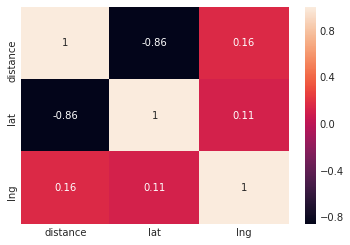

In [91]:
import seaborn as sns
sns.heatmap(corelation,xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

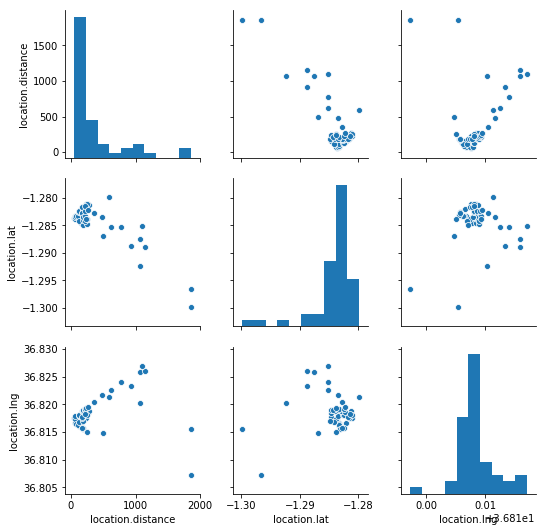

In [23]:
#Visualize relationship between variables

sns.pairplot(df)

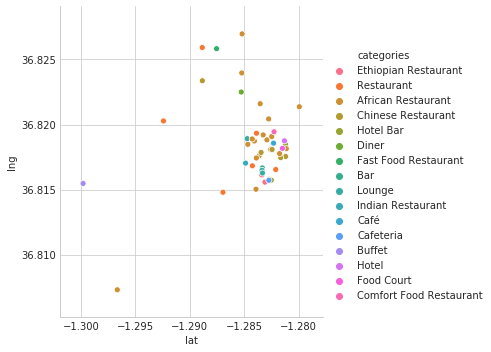

In [92]:
sns.relplot(x='lat',y='lng', hue='categories', data=YVN)

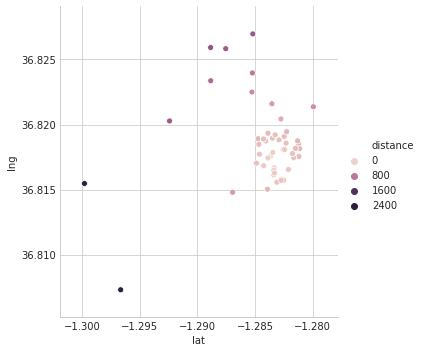

In [93]:
sns.relplot(x='lat',y='lng', hue='distance', data=YVN)

Text(0, 0.5, 'Distance in metres')

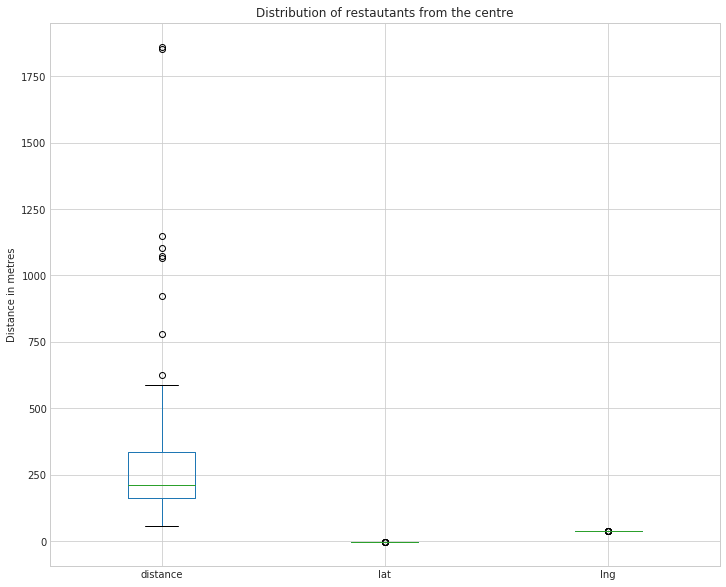

In [95]:
import matplotlib as mpl
import matplotlib.pyplot as plt

YVN.plot(kind='box', figsize=(12,10))

plt.title('Distribution of restautants from the centre')
plt.ylabel('Distance in metres')

In [97]:
# generate map centred around Nairobi 


venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 
# add a red circle marker to represent the centre point
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Nairobi',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add restaurants as blue circle markers
for lat, lng, label in zip(YVN.lat, YVN.lng, YVN.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Clustering categories of restaurants

In [30]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from  sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [31]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [98]:
YVN.head()

,categories,city,distance,formattedAddress,lat,lng
0,Ethiopian Restaurant,Nairobi,124,"[Utalii Street (Off Uhuru Highway), Nairobi, 0...",-1.283383,36.816130
1,Restaurant,Nairobi,151,"[Anniversary Towers, Nairobi, Kenya]",-1.282094,36.816540
2,None,Nairobi,159,"[Barclays Plaza (Kenyatta Avenue), Nairobi, Ke...",-1.284606,36.817718
3,African Restaurant,Nairobi,208,"[Nairobi, Kenya]",-1.284662,36.818480
4,Chinese Restaurant,Nairobi,232,"[koinange street, Nairobi, Kenya]",-1.281184,36.817544


In [99]:
YVN.shape

(50, 6)

In [100]:
x=YVN.ix[:,(4,5)].values
y=YVN.ix[:,(2)].values

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [101]:
A=linkage(x,'ward')

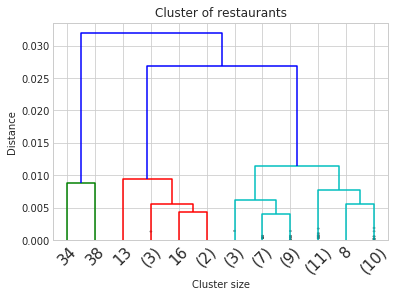

In [102]:
dendrogram(A, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Cluster of restaurants')
plt.xlabel('Cluster size')
plt.ylabel('Distance')

plt.axhline(y=250)

plt.show()